## Instructions
- See deadline on the course web page
- See examination rules on the course web page.
- This problem set is performed individually (collaboration is encouraged, but each individual must be able to explain all of his/her hand-in solutions).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- Many problems are automatically graded using `assert` statements. You should check that your code passes these statements without raising an `AssertionError`. Note that there might be additional, hidden tests that must be passed for full credit. In addition, some tasks are either completely manually graded or part-automatic/part-manual.

- **Important:** Hand-in is performed through the following actions:
  - Make sure to always complete **Task 0** in the header part of the notebook. 
  - Upload your solution in the form of your edited version of this jupyter notebook via the appropriate module in Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Your solutions are usually expected where it says `YOUR CODE HERE` or <font color="red">"PLEASE WRITE YOUR ANSWER HERE"</font>.

### Task 0 
#### (0 points)
Fill your personal details in the dictionary 'student' with the following key/value pairs:
- **Lastname**: Your lastname as a string
- **Firstname**: Your firstname as a string
- **DOB-year**: The year for your date of birth as a four-digit integer
- **DOB-month**: The month for your date of birth as an integer (1-12)
- **DOB-day**: The year for your date of birth as an integer (1-31)
- **CID**: Your Chalmers login ID as a string

In [51]:
student={}
# Update the values below. Note the formats.
student['Lastname']='Brou Boni'  # string
student['Firstname']='Joel' # string
student['CID']='joelaho'        # string
student['DOB-year']=1999         # four-digit integer
student['DOB-month']=5          # integer in the range [1, 12]
student['DOB-day']=11            # integer in the range [1, 31]

# 
# YOUR CODE HERE
# 

In [52]:
for key in ['Lastname', 'Firstname','CID']:
    assert type(student[key]) is str, f'{key} is wrong type.'
    assert student[key] not in ['name_here','cid_here'],\
        f'Fill your {key} as a string.'

for key in ['DOB-year', 'DOB-month','DOB-day']:
    assert type(student[key]) is int, f'{key} is wrong type.'

assert (student['DOB-year'] > 1900 and student['DOB-year'] < 2100)
assert student['DOB-month'] in range(1,13), \
    'DOB month should be an integer in the range [1, 12]'
assert student['DOB-day'] in range(1,32), \
    'DOB day should be an integer in the range [1, 31]'

# Problem Set 1
## Extra problems
### Learning from data [TIF285], Chalmers, Fall 2020

Last revised: 29-Aug-2020 by Christian Forssén [christian.forssen@chalmers.se]

## Instructions
- See deadline on the course web page
- This problem set is performed individually (but collaboration is encouraged).
- The two notebooks for each problem set contain a number of basic and extra problems; you can choose which and how many to work on.
- See examination rules on the course web page.
- Hand-in is performed through the following action:
  - Make sure to always complete **Task 0** in the *"Basic problems" notebook. This corresponds to providing your personal details and is needed for examination.
  - Upload your solution in the form of your edited version of this jupyter notebook via Canvas.
  - The name of the uploaded file **must be the same as the original one**!
  
  Note that the hand-in might not be automatically graded if you have changed the name of the uploaded file.

In [53]:
# import modules

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d
import scipy as scipy
import sklearn
import emcee as emcee


# 

ModuleNotFoundError: No module named 'emcee'

## Problem 5 (extra)
### (3 points)

#### Reload the third dataset from Problem 3

In [54]:
datafile = 'DataFiles/dataset3.dat'
X, y = np.loadtxt(datafile, unpack=True)
m = len(X)
X = X.reshape(m,1); y = y.reshape(m,1)

#### Validation curves
Create a validation curve for the polynomial model (for different degrees) where you plot the training score and the validation score as a function of the model complexity. 
- The model complexity is simply the degree of the polynomial.
- For the computation of training and validation scores you are encouraged to use cross-validation which is more stable than the use of a single, random pair of training and validation sets.

Question to ponder:
- From this curve: Which order polynomial do you think was used when generating the data?

*Hint:* `scikit-learn` has a function `validation_curve` that might be useful. However, it is certainly instructive to implement the calculation of learning curves yourself.

Degree 1 , Neg MSE =  -7.273776794145496


NameError: name 'Z' is not defined

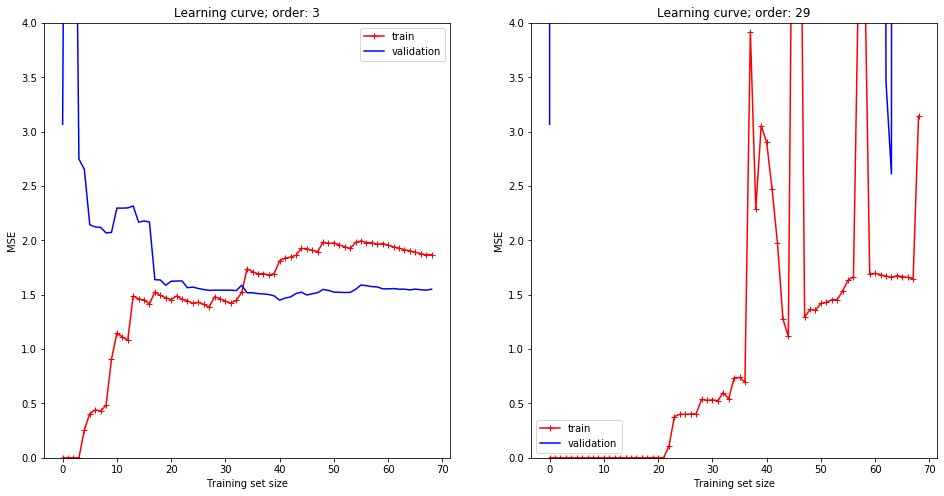

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import operator


def plot_learning_curves(model, x, y, ax=None):
    Xtrain, Xval, Ytrain, Yval = train_test_split(x, y, train_size=0.7, random_state=42)
    train_errors, val_errors = [], []
    
    
    for m in range(1, len(Xtrain)):
        model.fit(Xtrain[:m], Ytrain[:m])
        Ytrain_predict = model.predict(Xtrain[:m])
        Yval_predict = model.predict(Xval)
        train_errors.append(mean_squared_error(Ytrain[:m], Ytrain_predict))
        val_errors.append(mean_squared_error(Yval, Yval_predict))
        
    if not ax:
        fig,ax = plt.subplots(1,1)
    ax.plot(np.sqrt(train_errors), "r-+", label="train")
    ax.plot(np.sqrt(val_errors), "b-", label="validation")
    ax.legend(loc="best")
    ax.set_xlabel("Training set size")
    ax.set_ylabel("MSE")

fig,axs = plt.subplots(1,2,figsize=(16,8))

for i,degree in enumerate((3,29)):
    ax = axs[i]
    polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

    plot_learning_curves(polynomial_regression, X, y, ax=ax)
    ax.set_title(f'Learning curve; order: {degree}')
    ax.set_ylim([0,4]);


def design_matrix (X, degree=3):
   
    m = len(X)
    X_d = np.ones(X.shape)
    for i in range(1, degree+1):
        X_d = np.concatenate((X_d,X**i),axis=1)
    return X_d
i = 0 


for i in range(1,30):
    regr = linear_model.LinearRegression()
    print("Degree",i, ", Neg MSE = ", np.mean(cross_val_score(regr,design_matrix(X, degree=i), y, cv=5, scoring='neg_mean_squared_error')))
    Z.append(np.mean(cross_val_score(regr,design_matrix(X, degree=i), y, cv=5, scoring='neg_mean_squared_error')))

        
        
#The polynomial used to generate these datas seems to be a degree 3 polynomial 

## Problem 6 (extra)
### (3 points)

### Gradient descent methods

#### Generate noisy data with a quadratic feature
This is the same data as in Problem 2.

In [56]:
# Generate noisy data with a quadratic feature
# use the following code:
np.random.seed(42)

# X are picked uniform random [0,2]
X = 2 * np.random.rand(100, 1)
# Linear relation to the predicted value, but with Gaussian noise (mean=0, variance=1)
y = 0.5 * X**2 + X + 2 + 0.2 * np.random.randn(100, 1)

#### (a) Batch and stochastic gradient descent
Implement both batch and stochastic gradient descent and use these methods to find the best fit parameters of a quadratic model.
- You might want to tune the learning hyperparameter $\eta$.
- Do 50 epochs for the SGD (each epoch corresponding to using all instances of data once)
- Compare with the solution from Problem 2.

In [57]:
# Implement BGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)

def design_matrix (X, degree=2):
   
    m = len(X)
    X_d = np.ones(X.shape)
    for i in range(1, degree+1):
        X_d = np.concatenate((X_d,X**i),axis=1)
    return X_d
i = 0 

X_d = design_matrix(X,degree=2)
#X_d = np.c_[np.ones((m, 1)), X] 


theta_bgd = [] # Note the order
eta = 0.1
n_iter =2000
m=len(X)
theta_bgd_vector=[]
theta = np.random.randn(3,1)
for  i in range(n_iter):
    gradients = 2/m * X_d.T.dot(X_d.dot(theta) - y)
    theta_bgd_vector.append(theta)
    theta = theta - eta * gradients


theta_bgd = theta.flatten()
print('Bath Gradient Descent = ' , theta_bgd)

# 
# YOUR CODE HERE
# 

Bath Gradient Descent =  [2.11145546 0.73013319 0.61507503]


In [58]:
# Implement SGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)

def design_matrix (X, degree=2):
    m = len(X)
    X_d = np.ones(X.shape)
    for i in range(1, degree+1):
        X_d = np.concatenate((X_d,X**i),axis=1)
    return X_d
i = 0 


m=len(X)
eta = 0.5
X_d = design_matrix(X,degree=2)
theta_sgd = np.array([0., 0., 0.])
theta_sgd=theta_sgd.reshape(-1,1)
epoch = 50
theta_sgd_vector= []
for i in range (epoch): 
    for j in range (m):
        rd_index= np.random.randint(m)
        X_d2 = X_d[rd_index:rd_index+1]
        y2 = y[rd_index:rd_index+1]
        grad=2/m *X_d2.T.dot(X_d2.dot(theta_sgd)-y2)
        theta_sgd= theta_sgd-eta*grad
    theta_sgd_vector.append(theta_sgd)
theta_sgd=theta_sgd.flatten()
print('Stochastic Gradient Descent =',theta_sgd)
print('Bath Gradient Descent = ' , theta_bgd)



Stochastic Gradient Descent = [2.05293427 0.85178167 0.5309271 ]
Bath Gradient Descent =  [2.11145546 0.73013319 0.61507503]


In [59]:
assert theta_bgd.shape ==(3,)
assert not (theta_bgd==0).any()
assert theta_sgd.shape ==(3,)
assert not (theta_sgd==0).any()


#### (b) Mini-batch gradient descent
Implement mini-batch gradient descent and use this method to find the best fit parameters. Details:
- use a mini-batch size of 20%
- apply a similar learning schedule as in the SGD example (you might have to tune the learning hyperprameters)
- perform 50 epochs 
- hint: the `numpy.random.permutation` function might be useful for creating the mini-batches. 
- Compare with the solutions from BGD and SGD.

In [60]:
# Implement MBGD and use it to find the best-fit parameters
#
# At the end, the following array should contain the 
# best-fit parameters: 
# theta_0 (constant term), theta_1 (linear), theta_2 (quadratic)
 # Note the order
def design_matrix (X, degree=2):
    m = len(X)
    X_d = np.ones(X.shape)
    for i in range(1, degree+1):
        X_d = np.concatenate((X_d,X**i),axis=1)
    return X_d
i = 0 

X_dF = design_matrix(X)

theta_mbgd_vector= []
def calculEta(epoch):
    return 5/(50+epoch)

def MBG(X,y,theta_mbgd,size=0.2):
    m=len(X)
    epoch = 50
    mini=np.arange(0,m,size*m)

    for i in range(epoch):
        Rand_index=np.random.permutation(mini)
        eta=calculEta(epoch)
        for j in range (len(Rand_index)):
            rd_index=int(Rand_index[j])
            X_d2 = X_d[rd_index:rd_index+20]
            y2 = y[rd_index:rd_index+20]
            k= len(X_d2)
            grad=2/k*X_d2.T.dot(X_d2.dot(theta_mbgd)-y2)
            theta_mbgd= theta_mbgd-eta*grad
    theta_mbgd_vector.append(theta_mbgd)
    
    return theta_mbgd
            
theta_mbgd = np.array([0., 0., 0.])
theta_mbgd=theta_mbgd.reshape((-1,1))
print(theta_mbgd.shape)
theta_mbgd = MBG(X_dF,y,theta_mbgd,size=0.2)
theta_mbgd=theta_mbgd.flatten()
print('Mini-batch gradient descent = ', theta_mbgd)
# 
# YOUR CODE HERE
# 

(3, 1)
Mini-batch gradient descent =  [2.05783813 0.88300749 0.541736  ]


In [61]:
assert theta_mbgd.shape ==(3,)
assert not (theta_mbgd==0).any()


#### (c) Convergence
Compare the convergence pattern for the BGD, SGD and MGD, i.e. plot the path towards the optimal set of parameters. 
- Note that the path is in 3D (since there are three parameters in our quadratic model). You can plot 2D projections of the path.

In [62]:
#
plt.show()
#axes3d.plot(theta_bgd_vector, theta_sgd, theta_bgd),I got an error here.

